## Использование алгоритма KNN для задач многоклассовой классификации и регрессии; рассчёт и интерпретация метрик качества.  
### [Датасет ирис]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris, load_wine, load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    mean_absolute_error, mean_squared_error, r2_score
)

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, f1_score

In [ ]:
db = load_iris()
X, y = db.data, db.target
X = pd.DataFrame(X)
y = pd.DataFrame(y, columns=['target'])
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

knn_model_1 = KNeighborsClassifier(n_neighbors=1)
knn_model_1.fit(X_train, y_train.values.ravel())
knn_model_3 = KNeighborsClassifier(n_neighbors=3)
knn_model_3.fit(X_train, y_train.values.ravel())
knn_model_5 = KNeighborsClassifier(n_neighbors=5)
knn_model_5.fit(X_train, y_train.values.ravel())
knn_model_10 = KNeighborsClassifier(n_neighbors=10)
knn_model_10.fit(X_train, y_train.values.ravel())
knn_model_15 = KNeighborsClassifier(n_neighbors=15)
knn_model_15.fit(X_train, y_train.values.ravel())
knn_model_30 = KNeighborsClassifier(n_neighbors=30)
knn_model_30.fit(X_train, y_train.values.ravel())

def print_metrics(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)

    print(f"Metrics for {model_name}:")
    print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
    print("Precision:", round(precision_score(y_test, y_pred, average='macro'), 4))
    print("Recall:", round(recall_score(y_test, y_pred, average='macro'), 4))
    print("F1_score:", round(f1_score(y_test, y_pred, average='macro'), 4))

    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", cm)
    print("\n")

print_metrics(knn_model_1, X_test, y_test, "KNN model with n_neighbors=1")
print_metrics(knn_model_3, X_test, y_test, "KNN model with n_neighbors=3")
print_metrics(knn_model_5, X_test, y_test, "KNN model with n_neighbors=5")
print_metrics(knn_model_10, X_test, y_test, "KNN model with n_neighbors=10")
print_metrics(knn_model_15, X_test, y_test, "KNN model with n_neighbors=15")
print_metrics(knn_model_30, X_test, y_test, "KNN model with n_neighbors=30")

Metrics for KNN model with n_neighbors=1:
Accuracy: 0.9667
Precision: 0.9697
Recall: 0.9667
F1_score: 0.9666
Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]


Metrics for KNN model with n_neighbors=3:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1_score: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


Metrics for KNN model with n_neighbors=5:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1_score: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


Metrics for KNN model with n_neighbors=10:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1_score: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


Metrics for KNN model with n_neighbors=15:
Accuracy: 0.9667
Precision: 0.9697
Recall: 0.9667
F1_score: 0.9666
Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


Metrics for KNN model with n_neighbors=30:
Accuracy: 0.9333
Precision: 0.9333
Recall: 0.9333
F1_score: 0.9333
Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]




In [ ]:
print(X.shape)

(150, 4)


Модель лучше работает, когда мы смотрим на ближайших 3-10 соседей, так как если смотрим на большее количество(15/30), то берём большую область и задеваем нерелевантные точки (из-за достаточно маленького размера датасета - 150)

PS Больше анализа в 3 задании

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'] 

Metrics for KNN model with n_neighbors=15:
MAE: 45.194
RMSE: 55.5134
R2 0.4183 



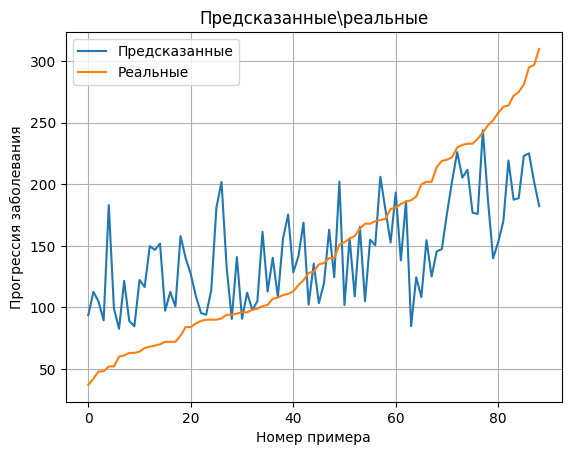

Metrics for KNN model with n_neighbors=30:
MAE: 46.2213
RMSE: 55.8763
R2 0.4107 



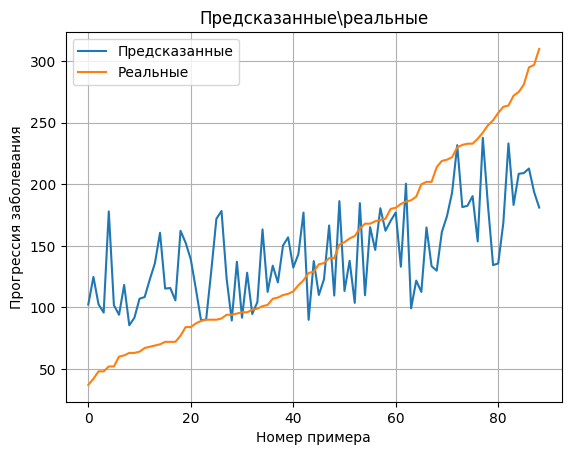

Metrics for KNN model with n_neighbors=50:
MAE: 45.5822
RMSE: 54.978
R2 0.4295 



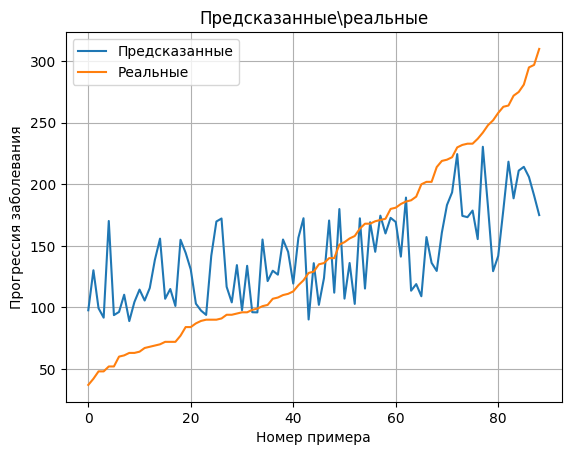

Metrics for KNN model with n_neighbors=70:
MAE: 46.2607
RMSE: 55.6712
R2 0.415 



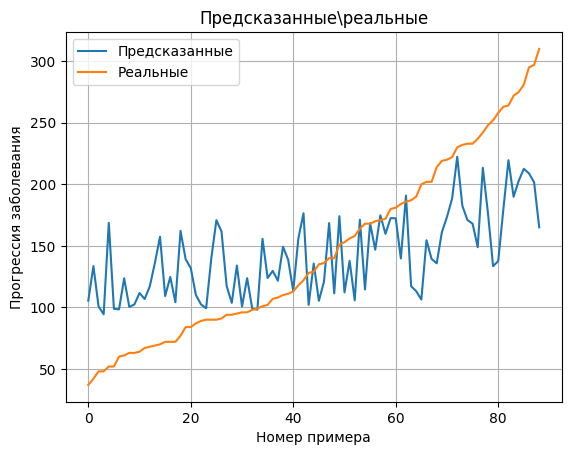

In [ ]:
dt=load_diabetes()
X1, y1=dt.data, dt.target

print(dt.feature_names, "\n")

X1 = pd.DataFrame(X1)
y1 = pd.DataFrame(y1, columns=['target'])
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1, test_size=0.2, random_state=42)

model_15 = KNeighborsRegressor(n_neighbors=15)
model_15.fit(X1_train, y1_train.values.ravel())
model_30 = KNeighborsRegressor(n_neighbors=30)
model_30.fit(X1_train, y1_train.values.ravel())
model_50 = KNeighborsRegressor(n_neighbors=50)
model_50.fit(X1_train, y1_train.values.ravel())
model_70 = KNeighborsRegressor(n_neighbors=70)
model_70.fit(X1_train, y1_train.values.ravel())

def print_metrics(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)

    print(f"Metrics for {model_name}:")
    print("MAE:", round(mean_absolute_error(y_test, y_pred), 4))
    print("RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred)), 4))
    print("R2", round( r2_score(y_test, y_pred), 4), "\n")

    sidx = np.argsort(y_test.values.ravel())
    y_test_sorted = np.sort(y_test.values.ravel())
    y_pred_sorted = y_pred[sidx]
    plt.plot(range(len(y_pred)), y_pred_sorted, label='Предсказанные')
    plt.plot(range(len(y_test)), y_test_sorted, label='Реальные')

    plt.title(f'Предсказанные\реальные')
    plt.xlabel('Номер примера')
    plt.ylabel('Прогрессия заболевания')
    plt.legend()
    plt.grid(True)
    plt.show()

print_metrics(model_15, X1_test, y1_test, "KNN model with n_neighbors=15")
print_metrics(model_30, X1_test, y1_test, "KNN model with n_neighbors=30")
print_metrics(model_50, X1_test, y1_test, "KNN model with n_neighbors=50")
print_metrics(model_70, X1_test, y1_test, "KNN model with n_neighbors=70")

MAE_46, MRSE ~ 55, R2 ~ 0.4

Ну как-то не супер точно мы предсказали :)

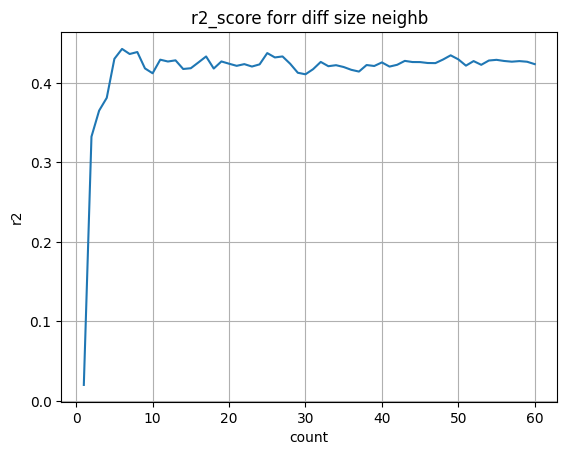

In [ ]:
vals=range(1, 61)
r2=[]
for k in vals:
  model=KNeighborsRegressor(n_neighbors=k)
  model.fit(X1_train, y1_train.values.ravel())
  r2.append(r2_score(y1_test, model.predict(X1_test)))
plt.plot(vals, r2)

plt.title("r2_score forr diff size neighb")
plt.xlabel("count")
plt.ylabel("r2")
plt.grid(True)
plt.show()

При k~7-8 выходит на +- одинаковое значение

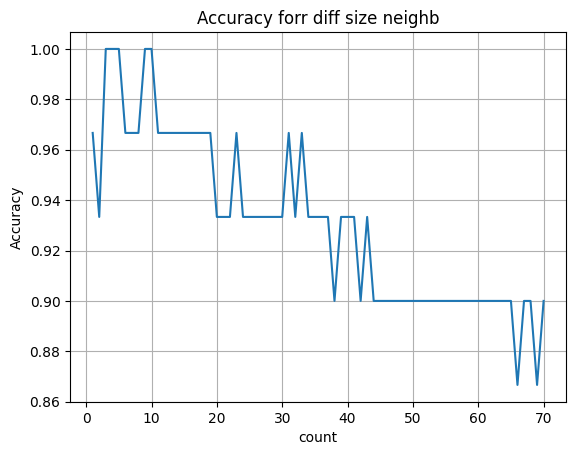

In [ ]:
vals=range(1, 71)
acc=[]
for k in vals:
  model=KNeighborsClassifier(n_neighbors=k)
  model.fit(X_train, y_train.values.ravel())
  acc.append(accuracy_score(y_test, model.predict(X_test)))
plt.plot(vals, acc)

plt.title("Accuracy forr diff size neighb")
plt.xlabel('count')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

То есть с увеличением количества понижается точность